# I. Gradient Descent untuk Regresi Logistik

**Tujuan Pembelajaran:** mampu mengimplementasikan algoritma Gradient Descent Regresi Logistik untuk Klasifikasi.

Dalam tugas ini, Anda akan diberikan sebuah data dummy untuk tugas klasifikasi. Buatlah algoritma Gradient Descent untuk membuat model prediksi label.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv('data_logistic.txt', names = ['x1', 'x2', 'Class'])
display(data)

,x1,x2,Class
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## Melakukan visualisasi Data

Untuk memberikan gambaran mengenai sebaran data yang diberikan, kita dapat menggunakan fitur Seaborn untuk menggambar scatter plot dari data ```x1``` dan ```x2``` yang dibedakan warnanya berdasarkan labelnya pada kolom ```y```.

<AxesSubplot:xlabel='x1', ylabel='x2'>

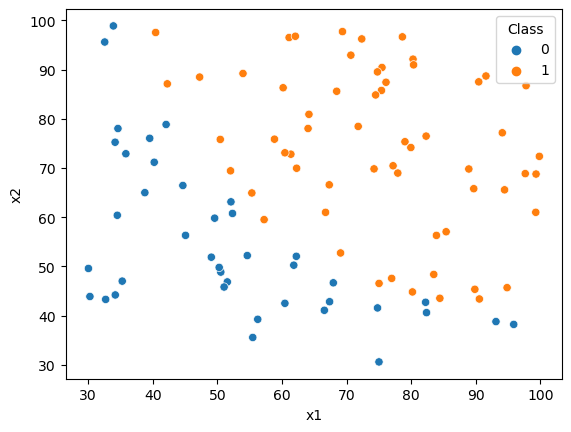

In [3]:
sns.scatterplot(x="x1", y="x2", hue='Class', data=data)

## Membangun model dengan Gradient Descent

Buatlah model regresi logistik (cari nilai parameter theta) untuk data yang diberikan dengan mengisi bagian yang kosong pada kode di bawah ini.

In [4]:
# X adalah matriks data latih/variabel input
# y adalah vektor label/variabel output

X = # isi kode di sini
y = # isi kode di sini

SyntaxError: invalid syntax (2601763086.py, line 4)

In [ ]:
# Logistic Regression Grad Descent

# pilih nilai hyperparameter yang sesuai
numIterations = # isi kode di sini
alpha = # isi kode di sini

# catatan: untuk mempersingkat waktu komputasi, fungsi cukup 
#          me-return nilai theta yang terkini saja; 
#          tidak perlu simpan semua kronologisnya.

def GradDescLogistic(X, y, numIterations, alpha):
    m, n = np.shape(X)
    theta = np.zeros(n+1)
    
    # isi kode di sini

    return theta

theta = GradDescLogistic(X, y, numIterations, alpha)
print(theta)

## Membangun visualisasi Hasil Prediksi

Untuk memberikan gambaran mengenai hasil model, kita dapat menggambar scatter plot yang sama dengan ditambah kurva '*boundary decision*'. Pada gambar di bawah ini, garis berwarna hijau menunjukkan batas yang membedakan antara 'wilayah' kelas 0 dan 'wilayah' kelas 1. Sebagai ilustrasi, titik berwarna oranye di bawah garis hijau menandakan False Positive, karena label yang benar adalah 1, namun model memutuskan bahwa titik tersebut masuk dalam wilayah kelas 0.

In [ ]:
[theta0, theta1, theta2] = theta
m = -theta1 / theta2
b = -theta0 / theta2

def boundary(x, m, b):
  return m*x + b

x_plot = np.linspace(30, 100, 1000)
y_plot = boundary(x_plot, m, b)
data_boundary = pd.DataFrame({"x": x_plot, "y": y_plot})

p1 = sns.scatterplot(x="x1", y="x2", hue='Class', data=data)
p2 = sns.lineplot(data=data_boundary, x='x', y='y', color='g')

## Membuat Confusion Matrix

Untuk mengevaluasi keberhasilan model yang sudah dibuat, buatlah Confusion Matrixnya. Setelah confusion matrix dihitung, maka ukuran performansi lainnya dapat dibuat, seperti accuracy, precision, recall, dan F1.

In [ ]:
# y_true adalah vektor yang berisi label yang sesungguhnya (dari data latih)
# y_pred adalah vektor yang berisi label dari hasil prediksi model

def create_confusion_matrix(y_true, y_pred):
  # isi kode di sini
  return # isi kode di sini

c_mat = create_confusion_matrix(y, y_pred)
[[TP, FN], [FP, TN]] = c_mat

# Menghitung berbagai ukuran performansi model
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)
print(accuracy, precision, recall, F1)

# II. Klasifikasi Multikelas

**Tujuan Pembelajaran:** mampu menggunakan sklearn untuk menerapkan tugas klasifikasi multikelas terhadap data nyata.

Dalam halaman ini, modul akan mendemonstrasikan penggunaan library sklearn untuk suatu dataset Iris yang sangat terkenal dan klasik. Sementara itu, Anda akan diberikan sebuah data latih untuk klasifikasi biji kedelai. Anda diminta untuk **mereplikasi langkah-langkah yang dicontohkan untuk diterapkan ke dataset biji kedelai**. Gantilah code di bawah ini beserta dengan penjelasannya menjadi sesuai untuk kasus biji kedelai.

Credit Dataset:

KOKLU, M. and OZKAN, I.A., (2020), "*Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.*" Computers and Electronics in Agriculture, 174, 105507.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

## Memuat Dataset

In [ ]:
from sklearn import datasets
# dataset Iris tersedia di library sklearn karena sudah sangat klasik.

# load dataset
iris = datasets.load_iris()

# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
X = iris.data
display(df)

# Notes:
# the labels 0, 1, 2 at "target" column represent Iris species ‘setosa’, ‘versicolor’, and ‘virginica’, respectively.

In [ ]:
# dataset drybeans
data = pd.read_csv('Dry_Beans_Dataset.csv')
display(data)

## Mempersiapkan Data Latih dan Data Uji

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["target"], axis = 1)
y = df[["target"]]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
display(X_train)
display(y_train)

## Membangun Model Klasifikasi

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the classifier
logreg = LogisticRegression()

# Performing the model building
logreg.fit(X_train,y_train)

# Predicting the labels of the test dataset
y_pred=logreg.predict(X_test)

# Comparing the true labels vs predicted labels
compare = pd.DataFrame({"y_true": y_test["target"], "y_pred": y_pred})
display(compare)

## Membuat Confusion Matrix

In [ ]:
from sklearn import metrics

# Fungsi untuk menghitung confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

### Berikut merupakan kode untuk memproduksi heatmap visualisasi confusion matrix

# Tuliskan label dari masing-masing kelas sesuai urutan
class_names= ["setosa", "versicolor",  "virginica"]

# Membangun heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, ha="left")
plt.yticks(tick_marks, class_names, rotation='horizontal')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Menampilkan Ukuran Performansi Klasifikasi

Dalam klasifikasi multi kelas, ukuran performasi seperti Accuracy, Precision, Recall, dan F1 dihitung nilainya untuk setiap label/kelas dari klasifikasi. Dengan demikian, ukuran performansi hasil model klasifikasi untuk suatu kelas mungkin bisa berbeda dibading ukuran untuk kelas lainnya.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

## Membuat kesimpulan akhir

Berdasarkan nilai pada confusion matrix, dapat dilihat bahwa klasifikasi dengan menggunakan regresi logistik telah berjalan dengan sangat baik, yaitu hanya terdapat 1 kali kesalahan saja di antara seluruh data uji yang tersedia. Kelas yang menerima ukuran  performansi yang sempurna adalah kelas 0, yaitu species 'Setosa'. Untuk kedua model yang lain, terdapat 1 buah hasil prediksi yang tidak sesuai dengan label yang seharusnya. Namun demikian, nilai F1-score untuk kedua kelas tersebut masih di atas 90%. Artinya model yang sudah ada cukup terandalkan untuk diterapkan untuk memprediksi label dari variabel input baru.